In [2]:
!pip install seaborn pandas matplotlib numpy;

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn

matplotlib.rcParams['figure.figsize'] = [17, 10]

df_orig = pd.read_csv('./credit_train.csv', sep=';', index_col='client_id')
df_orig.columns

Index(['gender', 'age', 'marital_status', 'job_position', 'credit_sum',
       'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region',
       'monthly_income', 'credit_count', 'overdue_credit_count',
       'open_account_flg'],
      dtype='object')

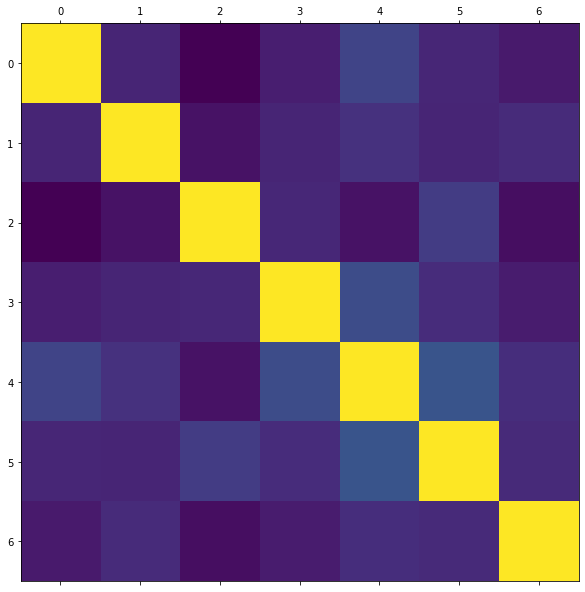

In [38]:
plt.matshow(df_orig.corr());

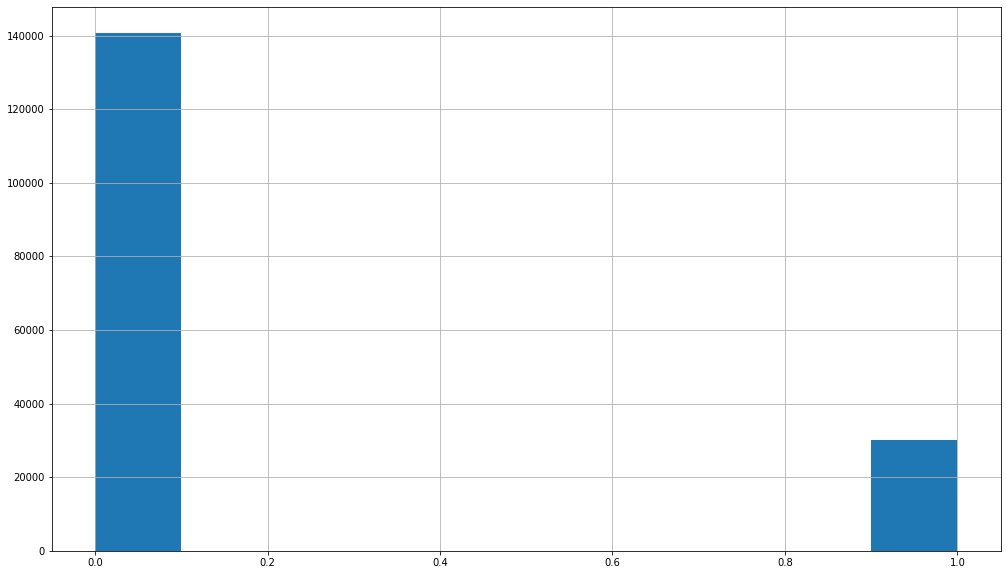

In [16]:
df_orig['open_account_flg'].hist();
# Из данной гистограммы можно увидеть, что классы несбалансированы

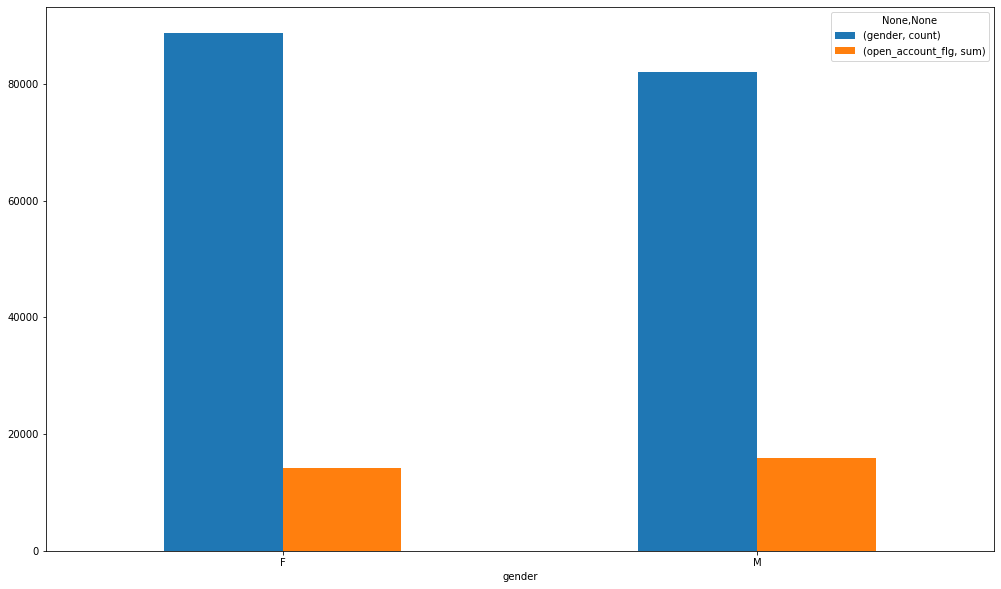

In [17]:
df_orig.groupby(by='gender').aggregate({'gender': ['count'], 'open_account_flg': ['sum']}).plot.bar(rot=0);
# Видим, что женщинам и мужчинам выдали кредитов поровну. Нет никакого феминизма

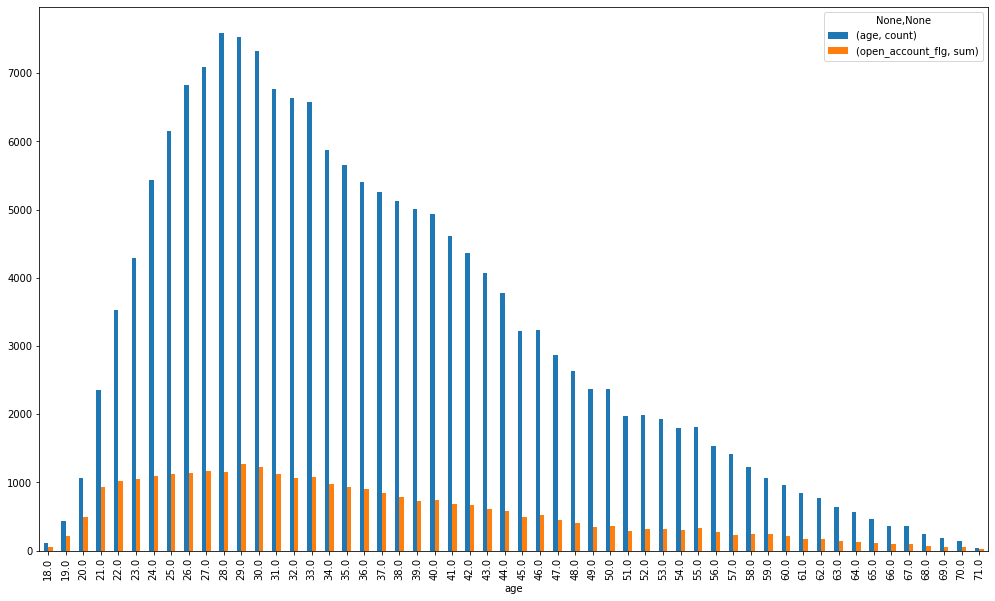

In [18]:
df_orig.groupby(by='age').aggregate({'age': ['count'], 'open_account_flg': ['sum']}).plot.bar();
# Охотнее выдают кредиты молодым людям от 21 до ~44.

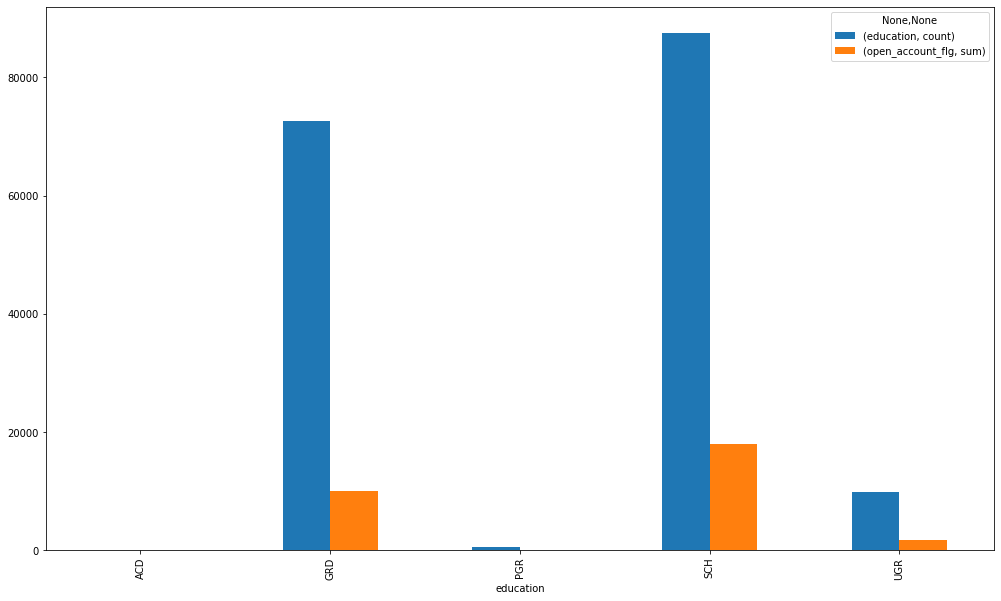

In [19]:
df_orig.groupby(by='education').aggregate({'education': ['count'], 'open_account_flg': ['sum']}).plot.bar();
# Видим, что по образованию все более менее равномерно. Мат ожидание выдачи кредита при любом образовании равно ~20%

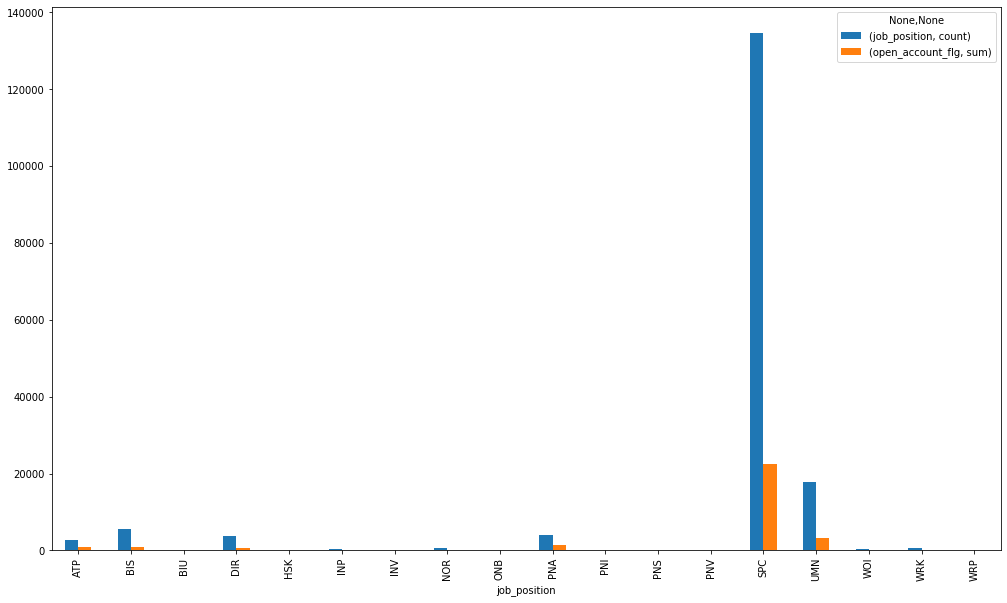

In [20]:
df_orig.groupby(by='job_position').aggregate({'job_position': ['count'], 'open_account_flg': ['sum']}).plot.bar();

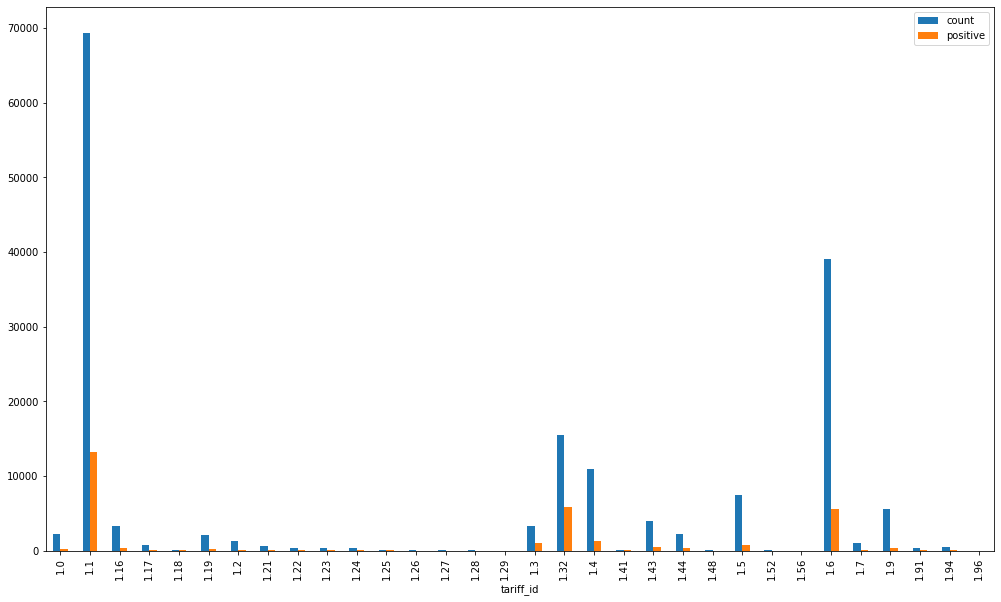

In [21]:
g = df_orig.groupby(['tariff_id']).agg({'open_account_flg': ['count', 'sum']})
def set_and_rename_columns(groupped_obj, rename_dict):
    groupped_obj.columns = groupped_obj.columns.droplevel(level=0)
    return g.rename(columns=rename_dict)

set_and_rename_columns(g, {'sum': 'positive'}).plot.bar();

In [25]:
df_orig.groupby(by='credit_count').aggregate({'credit_count': ['count'], 'open_account_flg': ['sum']})

# На самом деле тут видно, что даже человек с 21 кредитами может получить кредит. Куда важнее кредитная история. 
# То есть сколько кредитов он не выплатил

,credit_count,open_account_flg
,count,sum
credit_count,,
0.0,25806,3739
1.0,45279,7489
2.0,36998,5831
3.0,23918,4052
4.0,14113,2469
5.0,7543,1373
6.0,3915,774
7.0,1962,404


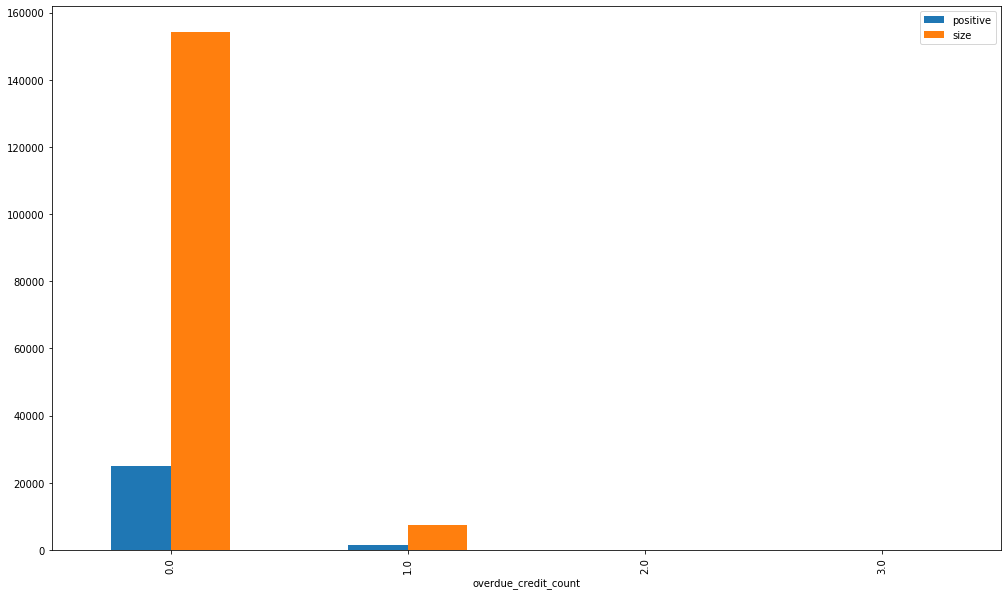

In [26]:
# 163365 человек, у которых нет задолженностей по кредитам
g = df_orig.groupby('overdue_credit_count').agg({'open_account_flg': ['sum', 'size']})
g = set_and_rename_columns(g, {'sum': 'positive'})

g.plot.bar();

# Видим, что сама по себе переменная 'overdue_credit_count' особо не влияет на выдачу/не выдачу кредита

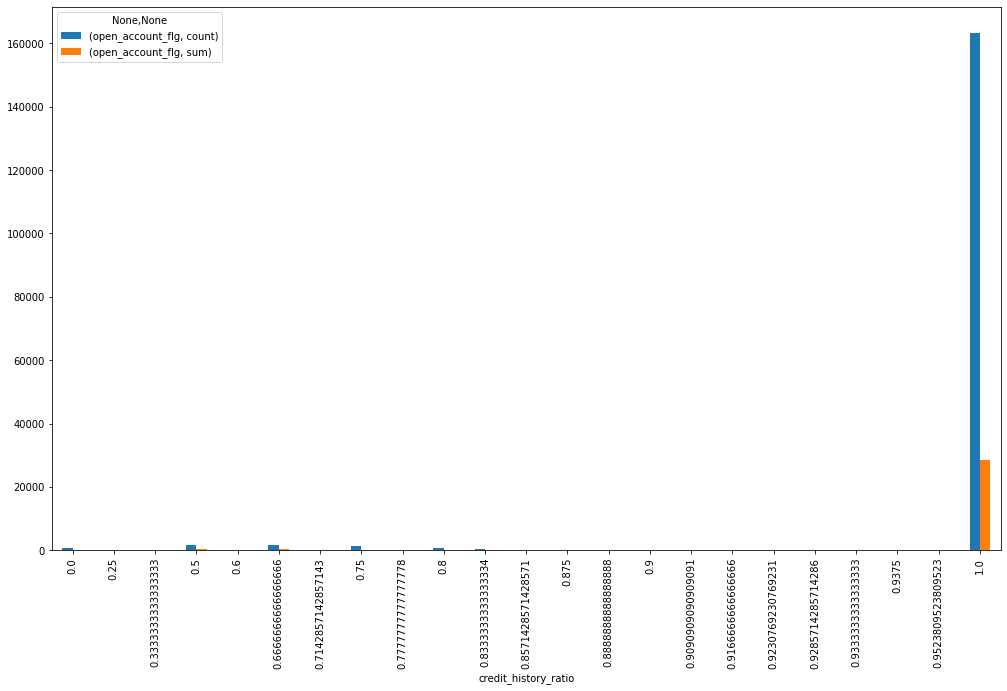

In [27]:
active_creditor = df_orig[df_orig['credit_count'] > 0]['credit_count']
df_orig['credit_history_ratio'] = (active_creditor - df_orig['overdue_credit_count']) / (active_creditor)

# Людей с хорошей кредитной историей будем считать положительными
df_orig['credit_history_ratio'].fillna(1, inplace=True)

df_orig.groupby('credit_history_ratio').agg({'open_account_flg': ['count', 'sum']}).plot.bar();

# Видим, что у людей, у которых либо нет кредитов либо у тех, кто все кредиты уже оплатил намного выше вероятность получить кредит

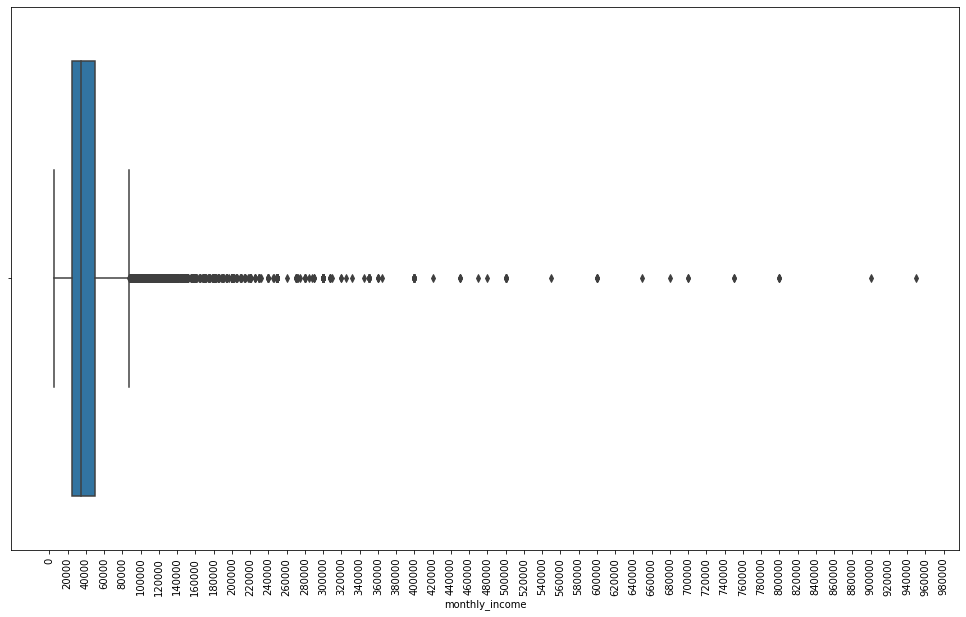

In [107]:
import seaborn as sns

ax = sns.boxplot(df_orig['monthly_income']);

ax.set_xticks(np.arange(0, 1000000, 20000));
plt.xticks(rotation=90);

# Видим, интерквантиль включает в себя людей у которых преимущественно зарплата находится между 20000 и 60000. То есть это примерно 75% выборки

In [29]:
df_orig['monthly_income_groups'] = df_orig['monthly_income']

df_orig.loc[df_orig['monthly_income'] <= 60000, 'monthly_income_groups'] = '<=60';

df_orig.loc[df_orig['monthly_income'] > 60000, 'monthly_income_groups'] = '>60'

df_orig.groupby('monthly_income_groups').count()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,credit_history_ratio
monthly_income_groups,,,,,,,,,,,,,,,
<=60,150440,150438,150439,150440,150439,150440,150440,150436,150438,150279,150440,141795,141795,150440,150440
>60,20301,20301,20301,20301,20301,20301,20301,20301,20301,20270,20301,19716,19716,20301,20301
